<h1>Predicting Sales Prices of a House</h1>

<h3>1. Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import norm
from scipy import stats

<h3>2. Importing dataframe</h3>

In [2]:
train = pd.read_csv(r"C:\Users\nakausha\Downloads\train_housing.csv")
test = pd.read_csv(r"C:\Users\nakausha\Downloads\test_housing.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<h3>3. Exploratory Data Analysis</h3>

In [5]:
display(train.shape)
display(test.shape)

(1460, 81)

(1459, 80)

In [6]:
test.loc[test['GarageCars'].isna(), 'GarageCars'] = 0
test.loc[test['TotalBsmtSF'].isna(), 'TotalBsmtSF'] = 0

In [7]:
id = test['Id']

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

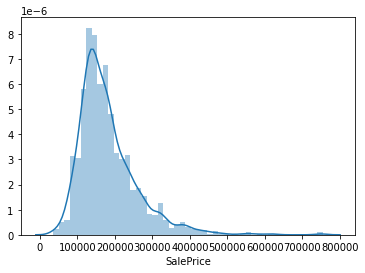

In [9]:
sns.distplot(train['SalePrice'])

In [10]:
print("Skew: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skew: 1.882876
Kurtosis: 6.536282


In [11]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
n_val = train.isna().sum().reset_index()
n_val.columns = ['index','count']
n_val = n_val[n_val['count']!=0]
n_val['percentage'] = (n_val['count']*100)/(train.shape[0])
n_val = n_val.sort_values(by='percentage', ascending=False)
n_val

,index,count,percentage
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
58,GarageType,81,5.547945
59,GarageYrBlt,81,5.547945
60,GarageFinish,81,5.547945
63,GarageQual,81,5.547945


In [13]:
train=train.drop(columns=['LotFrontage','Alley','PoolQC','MiscFeature','Fence','FireplaceQu', 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType'])
test=test.drop(columns=['LotFrontage','Alley','PoolQC','MiscFeature','Fence','FireplaceQu', 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType'])

In [14]:
train = train[~train['Electrical'].isna()]
test = test[~test['Electrical'].isna()]

In [15]:
test.loc[test['GarageArea'].isna(),'GarageArea'] = 0

In [16]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [17]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 64, dtype: int64

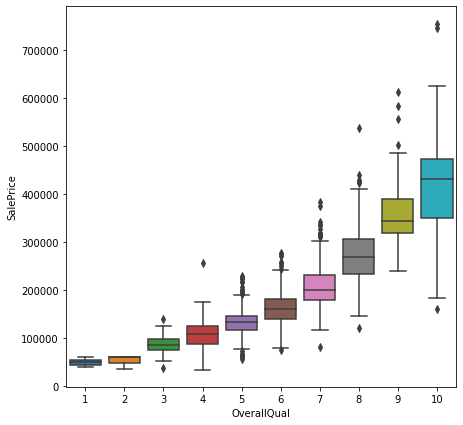

In [18]:
plt.figure(figsize=(7,7))
sns.boxplot(x='OverallQual',y='SalePrice', data=train)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

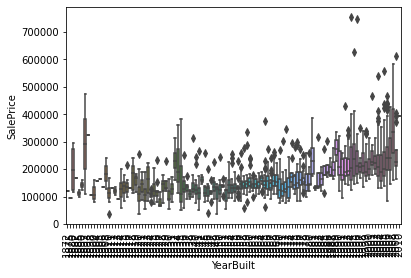

In [19]:
sns.boxplot(x='YearBuilt',y='SalePrice', data=train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

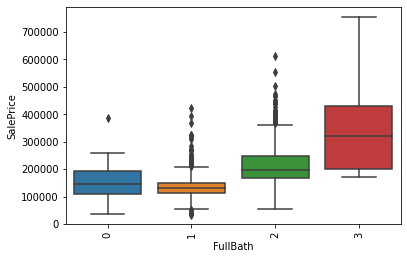

In [20]:
sns.boxplot(x='FullBath',y='SalePrice', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

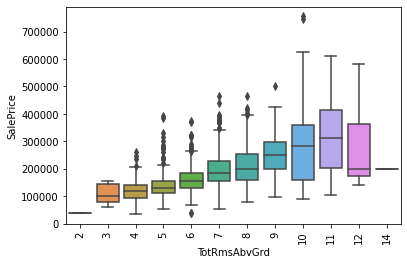

In [21]:
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice', data=train)
plt.xticks(rotation=90)

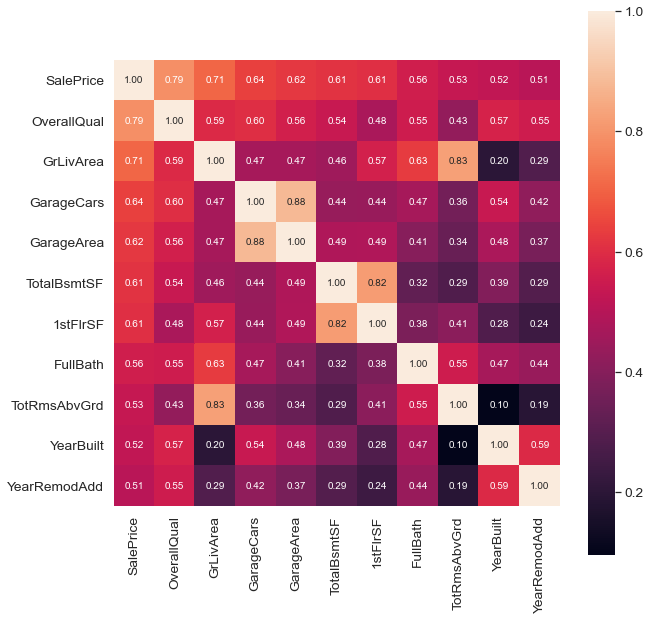

In [22]:
plt.figure(figsize=(10,10))
k = 11
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<h3>4. Feature Engineering</h3>

In [23]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


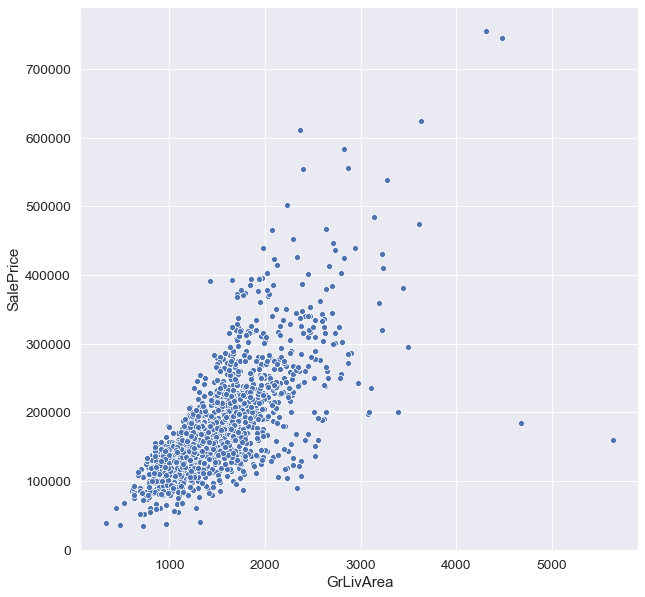

In [24]:
#bivariate analysis saleprice/grlivarea
plt.figure(figsize=(10,10))
sns.scatterplot(x='GrLivArea',y='SalePrice', data=train)

In [25]:
train = train.drop(list(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index))

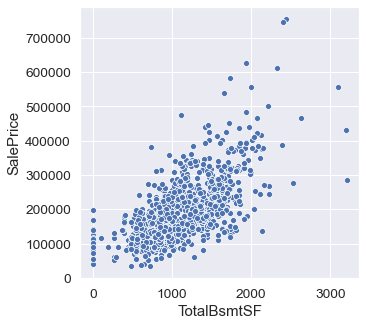

In [26]:
#bivariate analysis
plt.figure(figsize=(5,5))
sns.scatterplot(x='TotalBsmtSF',y='SalePrice', data=train)

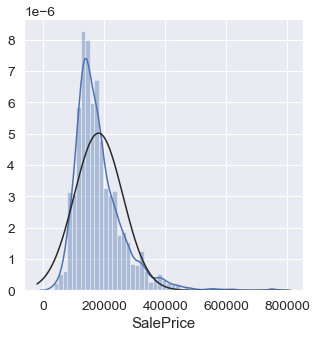

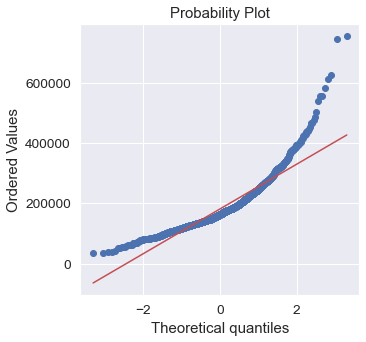

In [27]:
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train['SalePrice'], plot=plt)

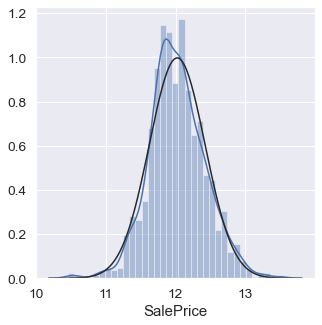

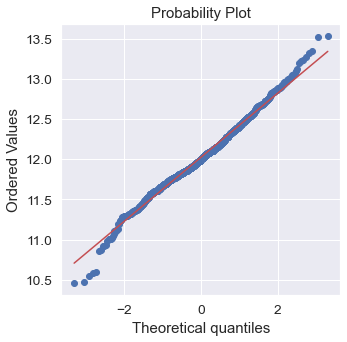

In [28]:
train['SalePrice']=np.log(train['SalePrice'])
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train['SalePrice'], plot=plt)

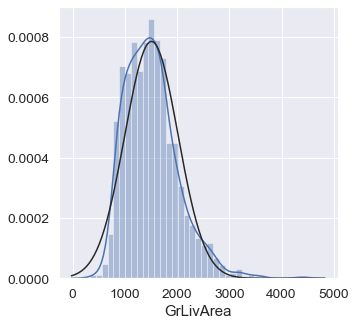

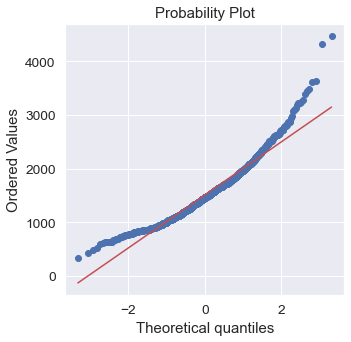

In [29]:
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train['GrLivArea'], plot=plt)

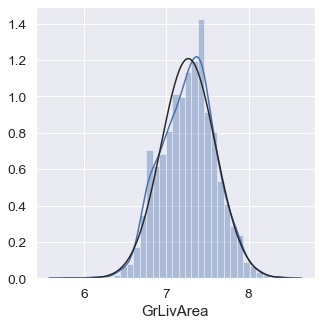

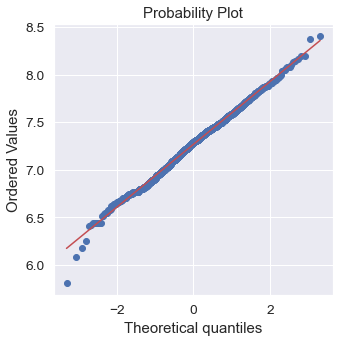

In [30]:
train['GrLivArea']=np.log(train['GrLivArea'])
test['GrLivArea']=np.log(test['GrLivArea'])
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train['GrLivArea'], plot=plt)

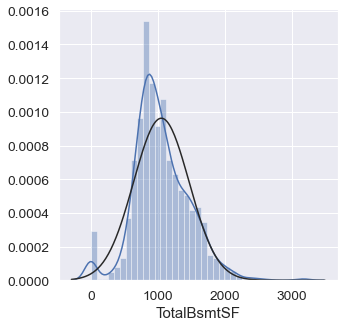

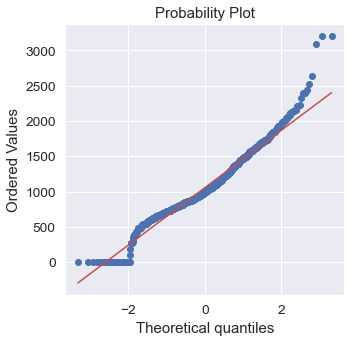

In [31]:
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [32]:
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [33]:
test['HasBsmt'] = pd.Series(len(test['TotalBsmtSF']), index=test.index)
test['HasBsmt'] = 0
test.loc[test['TotalBsmtSF']>0,'HasBsmt'] = 1

C:\Users\nakausha\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


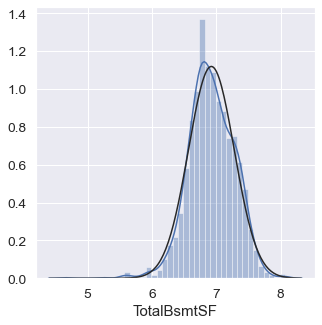

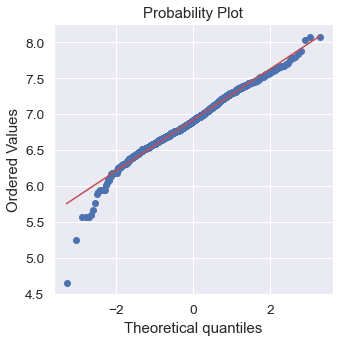

In [34]:
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
test.loc[test['HasBsmt']==1,'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

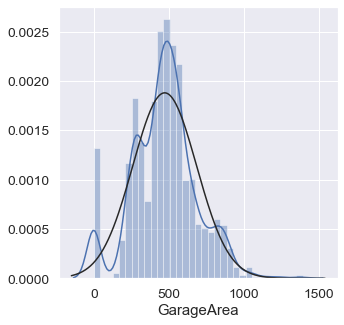

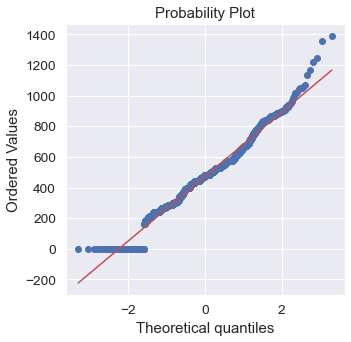

In [35]:
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train['GarageArea'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train['GarageArea'], plot=plt)

In [36]:
train['HasGarage'] = pd.Series(len(train['GarageArea']), index=train.index)
train['HasGarage'] = 0
train.loc[train['GarageArea']>0,'HasGarage'] = 1

In [37]:
test['HasGarage'] = pd.Series(len(test['GarageArea']), index=test.index)
test['HasGarage'] = 0
test.loc[test['GarageArea']>0,'HasGarage'] = 1

C:\Users\nakausha\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


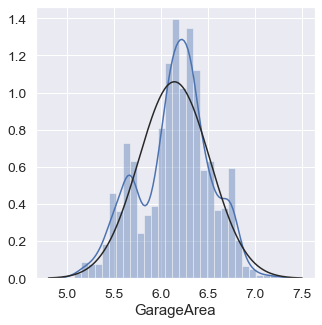

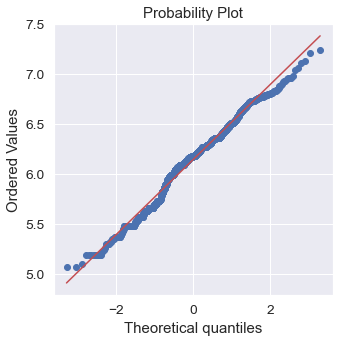

In [38]:
train.loc[train['HasGarage']==1,'GarageArea'] = np.log(train['GarageArea'])
test.loc[test['HasGarage']==1,'GarageArea'] = np.log(test['GarageArea'])
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train[train['GarageArea']>0]['GarageArea'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train[train['GarageArea']>0]['GarageArea'], plot=plt)

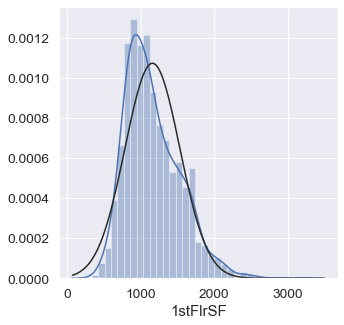

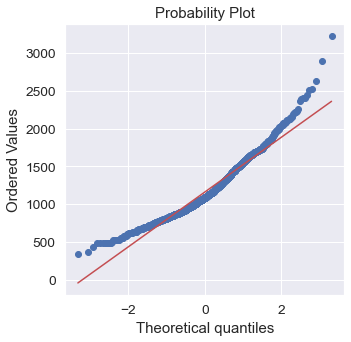

In [39]:
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train['1stFlrSF'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train['1stFlrSF'], plot=plt)

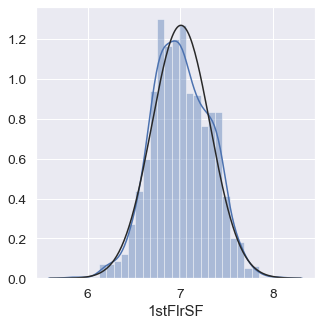

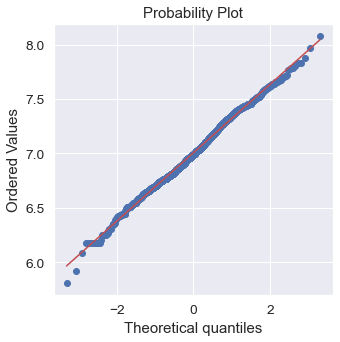

In [40]:
train['1stFlrSF']=np.log(train['1stFlrSF'])
test['1stFlrSF']=np.log(test['1stFlrSF'])
#histogram and normal probability plot
plt.figure(figsize=(5,5))
sns.distplot(train['1stFlrSF'], fit=norm);
fig = plt.figure(figsize=(5,5))
res = stats.probplot(train['1stFlrSF'], plot=plt)

In [41]:
#OverallQual, GarageCars, TotalBsmtSF, FullBath, TotRmsAbvGrd, YearBuilt, HasBsmt finalized for feature engineering

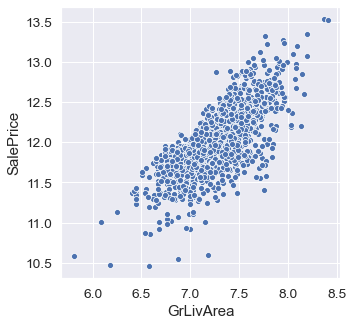

In [42]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

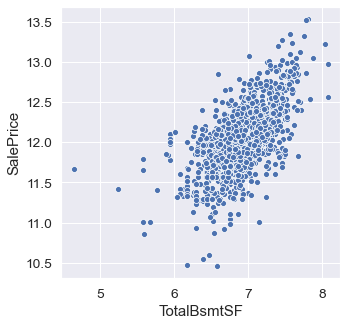

In [43]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train[train['TotalBsmtSF']>0])

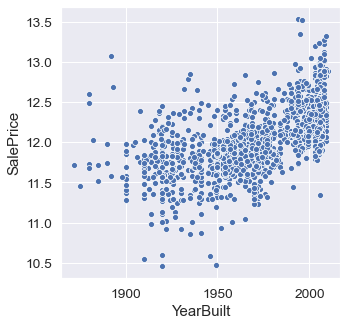

In [44]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=train['YearBuilt'],y=train['SalePrice'])

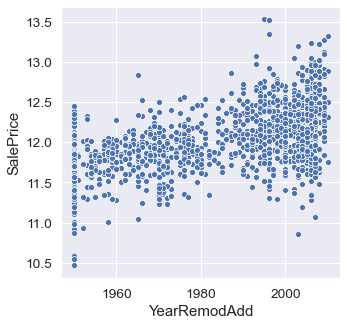

In [45]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=train['YearRemodAdd'],y=train['SalePrice'])

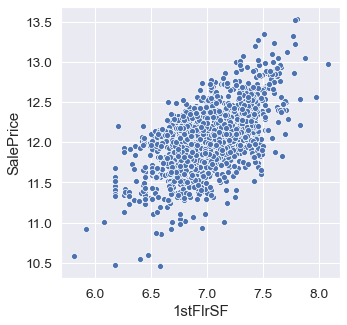

In [46]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=train['1stFlrSF'],y=train['SalePrice'])

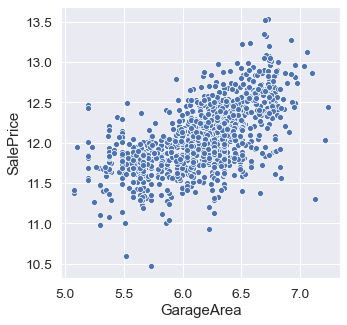

In [47]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=train[train['GarageArea']>0]['GarageArea'],y=train[train['GarageArea']>0]['SalePrice'])

In [48]:
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt,HasGarage
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,12.247694,1,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,12.109011,1,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,12.317167,1,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,11.849398,1,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,12.429216,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,12.072541,1,1
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2010,WD,Normal,12.254863,1,1
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,2010,WD,Normal,12.493130,1,1
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,2010,WD,Normal,11.864462,1,1


In [49]:
train = train[['Id','OverallQual','GarageCars','GarageArea','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt', 'YearRemodAdd','GrLivArea','HasBsmt','SalePrice','1stFlrSF','HasGarage']]
test = test[['Id','OverallQual','GarageCars','GarageArea','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt', 'YearRemodAdd','GrLivArea','HasBsmt','1stFlrSF','HasGarage']]

In [50]:
df = pd.concat([train,test], sort=False)

In [51]:
df

,Id,OverallQual,GarageCars,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GrLivArea,HasBsmt,SalePrice,1stFlrSF,HasGarage
0,1,7,2.0,6.306275,6.752270,2,8,2003,2003,7.444249,1,12.247694,6.752270,1
1,2,6,2.0,6.131226,7.140453,2,6,1976,1976,7.140453,1,12.109011,7.140453,1
2,3,7,2.0,6.410175,6.824374,2,6,2001,2002,7.487734,1,12.317167,6.824374,1
3,4,7,3.0,6.464588,6.628041,1,7,1915,1970,7.448334,1,11.849398,6.867974,1
4,5,8,3.0,6.728629,7.043160,2,9,2000,2000,7.695303,1,12.429216,7.043160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,0.0,0.000000,6.302619,1,5,1970,1970,6.995766,1,NaN,6.302619,0
1455,2916,4,1.0,5.655992,6.302619,1,6,1970,1970,6.995766,1,NaN,6.302619,1
1456,2917,5,2.0,6.356108,7.109879,1,7,1960,1996,7.109879,1,NaN,7.109879,1
1457,2918,5,0.0,0.000000,6.815640,1,6,1992,1992,6.877296,1,NaN,6.877296,0


In [52]:
import datetime as dt
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'].astype(str), format='%Y.%m')
df['YearBuilt']=df['YearBuilt'].map(dt.datetime.toordinal)

In [53]:
df['YearRemodAdd'] = pd.to_datetime(df['YearRemodAdd'].astype(str), format='%Y.%m')
df['YearRemodAdd']=df['YearRemodAdd'].map(dt.datetime.toordinal)

In [54]:
df

,Id,OverallQual,GarageCars,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GrLivArea,HasBsmt,SalePrice,1stFlrSF,HasGarage
0,1,7,2.0,6.306275,6.752270,2,8,731216,731216,7.444249,1,12.247694,6.752270,1
1,2,6,2.0,6.131226,7.140453,2,6,721354,721354,7.140453,1,12.109011,7.140453,1
2,3,7,2.0,6.410175,6.824374,2,6,730486,730851,7.487734,1,12.317167,6.824374,1
3,4,7,3.0,6.464588,6.628041,1,7,699074,719163,7.448334,1,11.849398,6.867974,1
4,5,8,3.0,6.728629,7.043160,2,9,730120,730120,7.695303,1,12.429216,7.043160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,0.0,0.000000,6.302619,1,5,719163,719163,6.995766,1,NaN,6.302619,0
1455,2916,4,1.0,5.655992,6.302619,1,6,719163,719163,6.995766,1,NaN,6.302619,1
1456,2917,5,2.0,6.356108,7.109879,1,7,715510,728659,7.109879,1,NaN,7.109879,1
1457,2918,5,0.0,0.000000,6.815640,1,6,727198,727198,6.877296,1,NaN,6.877296,0


<h3>5. Prediction Model</h3>

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['GarageArea','TotalBsmtSF','GrLivArea','1stFlrSF','TotRmsAbvGrd']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [56]:
df

,Id,OverallQual,GarageCars,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GrLivArea,HasBsmt,SalePrice,1stFlrSF,HasGarage
0,1,7,2.0,0.863260,0.791033,2,0.461538,731216,731216,0.599333,1,12.247694,0.345385,1
1,2,6,2.0,0.839298,0.836509,2,0.307692,721354,721354,0.487844,1,12.109011,0.487844,1
2,3,7,2.0,0.877483,0.799480,2,0.307692,730486,730851,0.615292,1,12.317167,0.371846,1
3,4,7,3.0,0.884931,0.776480,1,0.384615,699074,719163,0.600833,1,11.849398,0.387847,1
4,5,8,3.0,0.921075,0.825111,2,0.538462,730120,730120,0.691468,1,12.429216,0.452138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,0.0,0.000000,0.738356,1,0.230769,719163,719163,0.434745,1,NaN,0.180367,0
1455,2916,4,1.0,0.774243,0.738356,1,0.307692,719163,719163,0.434745,1,NaN,0.180367,1
1456,2917,5,2.0,0.870081,0.832927,1,0.384615,715510,728659,0.476623,1,NaN,0.476623,1
1457,2918,5,0.0,0.000000,0.798457,1,0.307692,727198,727198,0.391268,1,NaN,0.391268,0


In [57]:
df = pd.get_dummies(df, columns = ['OverallQual','HasBsmt','GarageCars','FullBath','HasGarage'])

In [58]:
test=df.loc[df['Id']>1460]
train=df.loc[df['Id']<1461]

In [59]:
test=test.drop(columns=['Id','SalePrice'])

In [60]:
train=train.drop(columns='Id')

In [61]:
train

,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GrLivArea,SalePrice,1stFlrSF,OverallQual_1,OverallQual_2,...,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,FullBath_0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HasGarage_0,HasGarage_1
0,0.863260,0.791033,0.461538,731216,731216,0.599333,12.247694,0.345385,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.839298,0.836509,0.307692,721354,721354,0.487844,12.109011,0.487844,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.877483,0.799480,0.307692,730486,730851,0.615292,12.317167,0.371846,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.884931,0.776480,0.384615,699074,719163,0.600833,11.849398,0.387847,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0.921075,0.825111,0.538462,730120,730120,0.691468,12.429216,0.452138,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.839298,0.803609,0.384615,729755,730120,0.585557,12.072541,0.384779,0,0,...,0,0,0,0,0,1,0,0,0,1
1456,0.850712,0.859984,0.384615,722085,725737,0.669980,12.254863,0.669980,0,0,...,0,0,0,0,0,1,0,0,0,1
1457,0.756918,0.825825,0.538462,708571,732312,0.714442,12.493130,0.465668,0,0,...,0,0,0,0,0,1,0,0,0,1
1458,0.750239,0.818047,0.230769,711858,728659,0.430010,11.864462,0.430010,0,0,...,0,0,0,0,1,0,0,0,0,1


In [62]:
test

,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GrLivArea,1stFlrSF,OverallQual_1,OverallQual_2,OverallQual_3,...,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,FullBath_0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HasGarage_0,HasGarage_1
0,0.902515,0.794538,0.230769,715876,715876,0.362145,0.362145,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.786154,0.842569,0.307692,714780,714780,0.506828,0.506828,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.845693,0.800494,0.307692,729025,729390,0.581524,0.375023,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.842242,0.800242,0.384615,729390,729390,0.575849,0.374231,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.852344,0.838168,0.230769,727198,727198,0.493041,0.493041,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.738356,0.230769,719163,719163,0.434745,0.180367,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0.774243,0.738356,0.307692,719163,719163,0.434745,0.180367,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1456,0.870081,0.832927,0.384615,715510,728659,0.476623,0.476623,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1457,0.000000,0.798457,0.307692,727198,727198,0.391268,0.391268,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [63]:
y=train['SalePrice']
X=train.drop(columns='SalePrice')
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1019, 32)
X_test : (438, 32)
y_train : (1019,)
y_test : (438,)


In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lr.score(X_test,y_test)

0.8729110700528397

In [66]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print("RMSE on Training set :", mean_squared_error(y_train,y_train_pred))
print("RMSE on Test set :", mean_squared_error(y_test,y_test_pred))

RMSE on Training set : 0.023324249148261863
RMSE on Test set : 0.01969427116454213


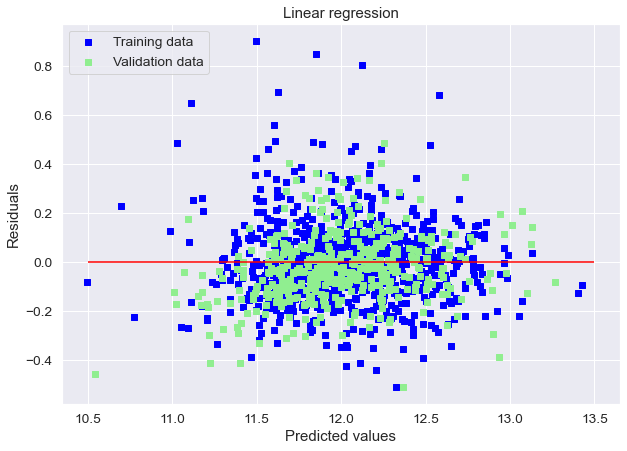

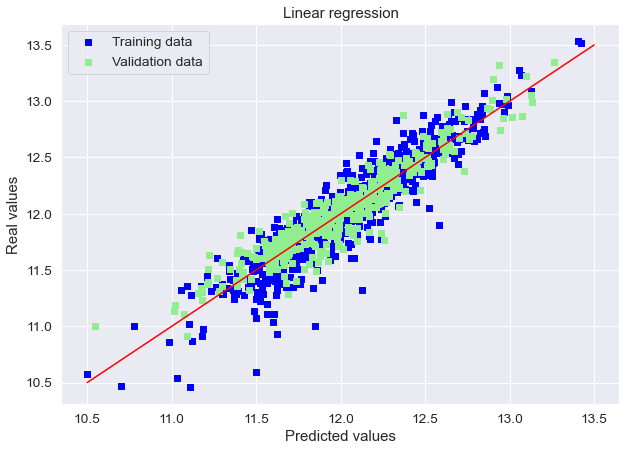

In [67]:
# Plot residuals
plt.figure(figsize=(10,7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
fig = plt.figure(figsize=(10,7))
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [68]:
test['SalePrice'] = lr.predict(test)

In [69]:
test['Id'] =id

In [70]:
test

,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GrLivArea,1stFlrSF,OverallQual_1,OverallQual_2,OverallQual_3,...,GarageCars_5.0,FullBath_0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HasGarage_0,HasGarage_1,SalePrice,Id
0,0.902515,0.794538,0.230769,715876,715876,0.362145,0.362145,0,0,0,...,0,0,1,0,0,0,0,1,11.641546,1461
1,0.786154,0.842569,0.307692,714780,714780,0.506828,0.506828,0,0,0,...,0,0,1,0,0,0,0,1,11.927317,1462
2,0.845693,0.800494,0.307692,729025,729390,0.581524,0.375023,0,0,0,...,0,0,0,1,0,0,0,1,12.061631,1463
3,0.842242,0.800242,0.384615,729390,729390,0.575849,0.374231,0,0,0,...,0,0,0,1,0,0,0,1,12.108246,1464
4,0.852344,0.838168,0.230769,727198,727198,0.493041,0.493041,0,0,0,...,0,0,0,1,0,0,0,1,12.236037,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.738356,0.230769,719163,719163,0.434745,0.180367,0,0,0,...,0,0,1,0,0,0,1,0,11.396879,2915
1455,0.774243,0.738356,0.307692,719163,719163,0.434745,0.180367,0,0,0,...,0,0,1,0,0,0,0,1,11.521545,2916
1456,0.870081,0.832927,0.384615,715510,728659,0.476623,0.476623,0,0,0,...,0,0,1,0,0,0,0,1,11.947000,2917
1457,0.000000,0.798457,0.307692,727198,727198,0.391268,0.391268,0,0,0,...,0,0,1,0,0,0,1,0,11.646622,2918


In [71]:
train

,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GrLivArea,SalePrice,1stFlrSF,OverallQual_1,OverallQual_2,...,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,FullBath_0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HasGarage_0,HasGarage_1
0,0.863260,0.791033,0.461538,731216,731216,0.599333,12.247694,0.345385,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.839298,0.836509,0.307692,721354,721354,0.487844,12.109011,0.487844,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.877483,0.799480,0.307692,730486,730851,0.615292,12.317167,0.371846,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.884931,0.776480,0.384615,699074,719163,0.600833,11.849398,0.387847,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0.921075,0.825111,0.538462,730120,730120,0.691468,12.429216,0.452138,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.839298,0.803609,0.384615,729755,730120,0.585557,12.072541,0.384779,0,0,...,0,0,0,0,0,1,0,0,0,1
1456,0.850712,0.859984,0.384615,722085,725737,0.669980,12.254863,0.669980,0,0,...,0,0,0,0,0,1,0,0,0,1
1457,0.756918,0.825825,0.538462,708571,732312,0.714442,12.493130,0.465668,0,0,...,0,0,0,0,0,1,0,0,0,1
1458,0.750239,0.818047,0.230769,711858,728659,0.430010,11.864462,0.430010,0,0,...,0,0,0,0,1,0,0,0,0,1


<h3>6. Kaggle Submission</h3>

In [72]:
submission = test[['Id','SalePrice']].set_index("Id", drop=True)

In [73]:
submission['SalePrice'] = np.exp(submission['SalePrice'])

In [74]:
submission

,SalePrice
Id,
1461,113725.851354
1462,151344.892484
1463,173101.023815
1464,181361.297621
1465,206083.533812
...,...
2915,89043.380699
2916,100865.651963
2917,154353.351334


In [75]:
submission.to_csv('housing_result.csv')